## Import Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [3]:
# importing data
df = pd.read_csv('household_power_consumption.txt', sep=';')

/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
#checking nan values in data
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

### Preprocessing Data

In [6]:
#reimporting data by changing Date, Time columns from string to date time stamp
df1 = pd.read_csv('household_power_consumption.txt', sep = ';', parse_dates = { 'DATE' : ['Date', 'Time']},
                 infer_datetime_format = True, low_memory = False, na_values = ['nan', '?'] )

In [7]:
df1.head()

,DATE,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
# checking nan values
df1.isnull().sum()

DATE                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
df1.shape

(2075259, 8)

In [10]:
#all types of features in dataset
df1.dtypes

DATE                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [11]:
#This function extracts datetime features of passed data
def Date_Time(dataFrame):
    dataFrame['Day'] = dataFrame['DATE'].dt.dayofweek
    dataFrame['Month'] = dataFrame['DATE'].dt.month
    dataFrame['Year'] = dataFrame['DATE'].dt.year
    dataFrame['Hour'] = dataFrame['DATE'].dt.hour
    dataFrame['Minute'] = dataFrame['DATE'].dt.minute
    
    dataFrame = dataFrame.drop(labels=['DATE'], axis=1)
    dataFrame = dataFrame[['Voltage', 'Global_intensity', 'Day', 'Month',
                           'Year', 'Hour','Minute','Global_active_power']]
    dataFrame = dataFrame.dropna()
    return(dataFrame)

In [12]:
#This function scales the data
def preprocess(dataFrame):
    
    date = dataFrame[['Day', 'Month','Year','Hour','Minute']]
    active_power = np.array(dataFrame['Global_active_power']).reshape(-1,1)
    power_df = dataFrame.drop(labels=['Day', 'Month','Year','Hour','Minute','Global_active_power'], axis = 1)
    #for input features    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(power_df)
    scaled_df = scaler.transform(power_df)
  
    #for output
    scaler2 = MinMaxScaler(feature_range=(0,1))
    scaler2.fit(active_power)
    scaled_active_power = scaler2.transform(active_power)
    
    scaled_df = pd.DataFrame(scaled_df, columns=power_df.columns)
    
    
    scaled_df[['Day', 'Month','Year','Hour','Minute']] =  date
    scaled_df['Global_active_power'] = scaled_active_power
    scaled_df= scaled_df.dropna()
    
    return(scaled_df, scaler, scaler2)


In [13]:
#This function removes outliers
def remove_outliers(data):
    without_outlier = data[np.abs(data["Hour"]
                                         -data["Hour"].mean())<=(3*data["Hour"].std())]

    return without_outlier

In [14]:
#ectracting datetime features
power_df = Date_Time(df1)

In [15]:
power_df.shape

(2049280, 8)

In [16]:
power_df.head()

,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Global_active_power
0,234.84,18.4,5,12,2006,17,24,4.216
1,233.63,23.0,5,12,2006,17,25,5.360
2,233.29,23.0,5,12,2006,17,26,5.374
3,233.74,23.0,5,12,2006,17,27,5.388
4,235.68,15.8,5,12,2006,17,28,3.666


In [17]:
#scaling all values
power_df1, input_scaler, result_scaler = preprocess(power_df)

In [18]:
power_df1.shape

(2023301, 8)

In [19]:
power_df1.head()

,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Global_active_power
0,0.376090,0.377593,5.0,12.0,2006.0,17.0,24.0,0.374796
1,0.336995,0.473029,5.0,12.0,2006.0,17.0,25.0,0.478363
2,0.326010,0.473029,5.0,12.0,2006.0,17.0,26.0,0.479631
3,0.340549,0.473029,5.0,12.0,2006.0,17.0,27.0,0.480898
4,0.403231,0.323651,5.0,12.0,2006.0,17.0,28.0,0.325005


In [20]:
#removing outliers
power_df1 = remove_outliers(power_df1)

In [21]:
power_df1.shape

(2023301, 8)

## Data Plots

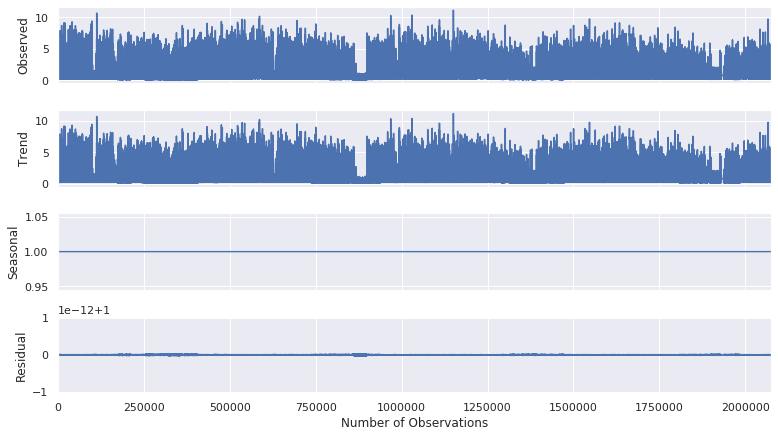

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,6)})
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(power_df['Global_active_power'], model='multiplicative', freq=1)
result.plot()
plt.xlabel('Number of Observations')
plt.show()

#### Time Series Distribution

Text(0, 0.5, 'Values')

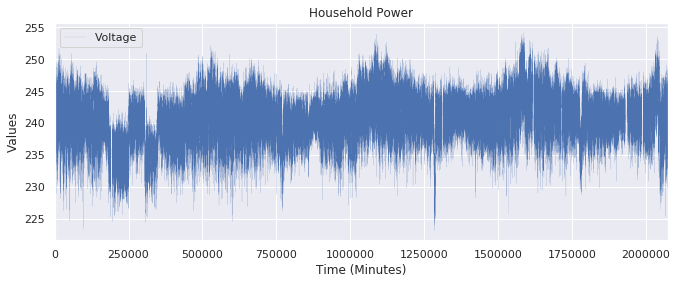

In [25]:
sns.set(rc={'figure.figsize':(11,4)})
power_df[['Voltage']].plot(linewidth=0.1, title='Household Power')
plt.xlabel('Time (Minutes)')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

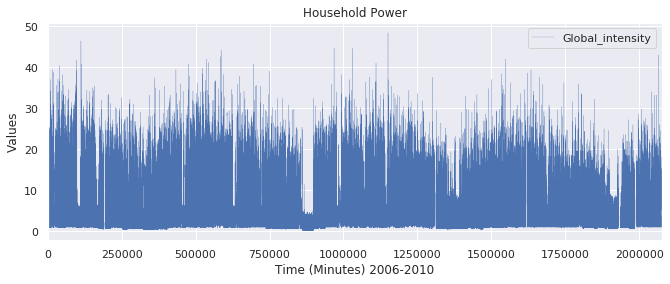

In [26]:
sns.set(rc={'figure.figsize':(11,4)})
power_df[['Global_intensity']].plot(linewidth=0.2, title='Household Power')
plt.xlabel('Time (Minutes) 2006-2010')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

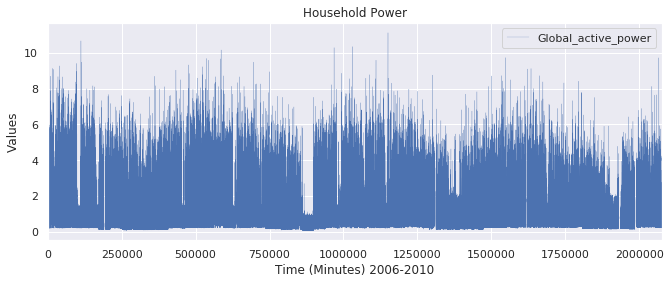

In [27]:
sns.set(rc={'figure.figsize':(11,4)})
power_df[['Global_active_power']].plot(linewidth=0.2, title='Household Power')
plt.xlabel('Time (Minutes) 2006-2010')
plt.ylabel('Values')

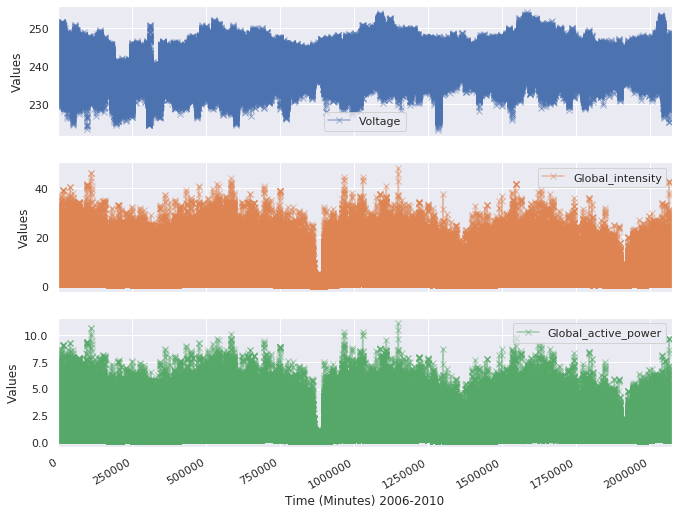

In [28]:
cols_plot = ['Voltage', 'Global_intensity','Global_active_power']
axes = power_df[cols_plot].plot(marker='x', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Values')
    ax.set_xlabel('Time (Minutes) 2006-2010')

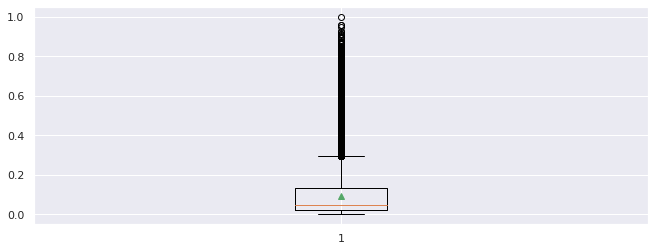

In [29]:
plt.boxplot(power_df1['Global_active_power'], showmeans=True)
plt.show()

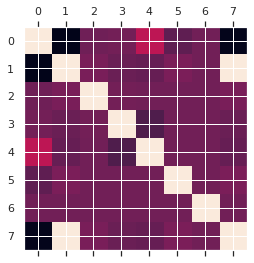

In [30]:
plt.matshow(power_df1.corr())
plt.show()

In [34]:
power_df1['Day'].unique()

array([5., 6., 0., 1., 2., 3., 4.])

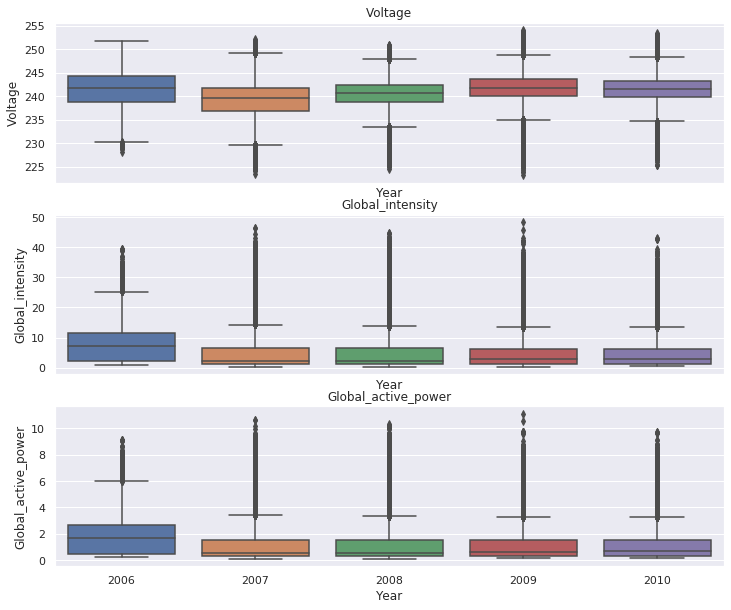

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
for name, ax in zip(['Voltage', 'Global_intensity', 'Global_active_power'], axes):
    sns.boxplot(data=power_df, x='Year', y=name, ax=ax)
    #ax.set_ylabel('')
    ax.set_title(name)

#### Heat Map

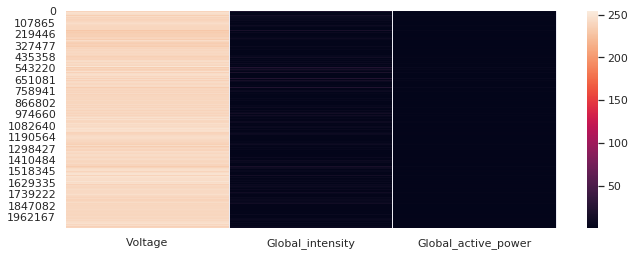

In [38]:
sns.heatmap(power_df[['Voltage', 'Global_intensity', 'Global_active_power']])

#### Histograms and Curve Distribution

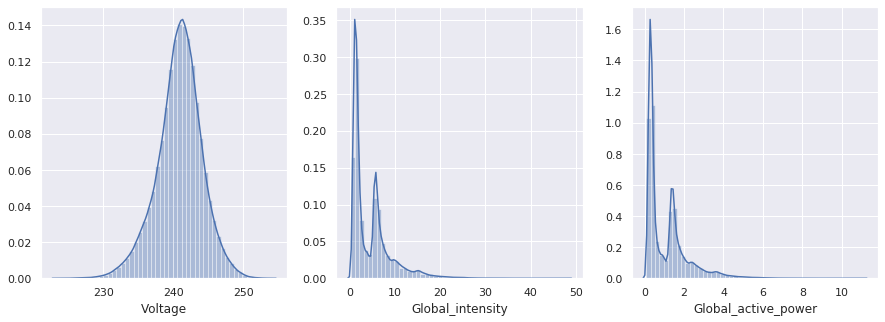

In [39]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for name, ax in zip(['Voltage', 'Global_intensity', 'Global_active_power'], axes):
    sns.distplot(power_df[name], ax=ax)

#### Correlation

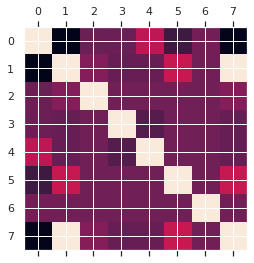

In [40]:
plt.matshow(power_df.corr())
plt.show()

#### Scatter Plot

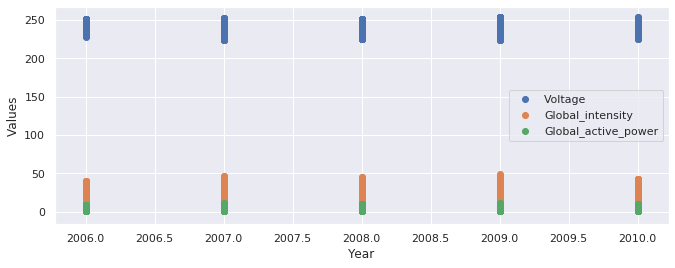

In [42]:
plt.scatter(power_df['Year'],power_df['Voltage'])
plt.scatter(power_df['Year'],power_df['Global_intensity'])
plt.scatter(power_df['Year'],power_df['Global_active_power'])
plt.legend(['Voltage', 'Global_intensity', 'Global_active_power'])
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

#### Trend Line

Text(0.5, 0, 'Days')

/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


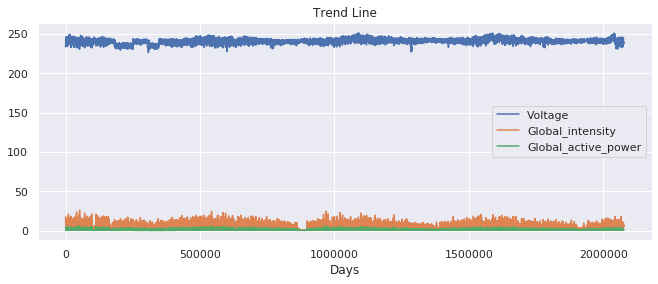

In [43]:
plt.plot(power_df['Voltage'].rolling(window=150, center=True, min_periods=30).mean())
plt.plot(power_df['Global_intensity'].rolling(window=150, center=True, min_periods=30).mean())
plt.plot(power_df['Global_active_power'].rolling(window=150, center=True, min_periods=30).mean())
plt.legend(['Voltage', 'Global_intensity', 'Global_active_power'])
plt.title('Trend Line')
plt.xlabel('Days')

### Divide Data into Train and Test Set

In [44]:
def train_test_data(data):
    x = np.array(data.iloc[:,:-1]) # selecting features from data
    y = np.array(data.iloc[:,-1])  # selecting features from data
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle= False)
    
    return (x_train, x_test, y_train, y_test)

In [45]:
# creating train/test variables from data
x_train, x_test, y_train, y_test = train_test_data(power_df1)

In [46]:
x_train.shape

(1618640, 7)

In [47]:
x_test.shape

(404661, 7)

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# creating model
rf = RandomForestRegressor(verbose=1)
# training model
rf.fit(x_train, y_train)
predict = rf.predict(x_test)

/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


In [52]:
# Output value is scaled. To get actual value undo scaled value of output
print('Scaled Value Predicted: %.2f' %predict[44])
print('Actual Predicted Value: %.2f'%result_scaler.inverse_transform([[predict[44]]]))
print('Real Value: %.2f'%result_scaler.inverse_transform([[predict[44]]]))

Scaled Value Predicted: 0.21
Actual Predicted Value: 2.42
Real Value: 2.42


In [43]:
# for saving model
import pickle
pickle.dump(rf, open('h_rb.pickle', 'wb'))
#rf = pickle.load(open('rb.pickle', 'rb'))

### Random Forest Evaluation

In [53]:
# printing different evaluation metrics
print('R_2 Score: %.7f' %r2_score(y_test, predict))
print('Mean Absolute Error: %.7f' %mean_absolute_error(y_test, predict))
print('Mean Square Error: %.7f' %mean_squared_error(y_test, predict))
print('Root Mean Square Error: %.7f' %np.sqrt(mean_squared_error(y_test, predict)))

R_2 Score: 0.9968339
Mean Absolute Error: 0.0029460
Mean Square Error: 0.0000213
Root Mean Square Error: 0.0046136


### Random Forest Plots

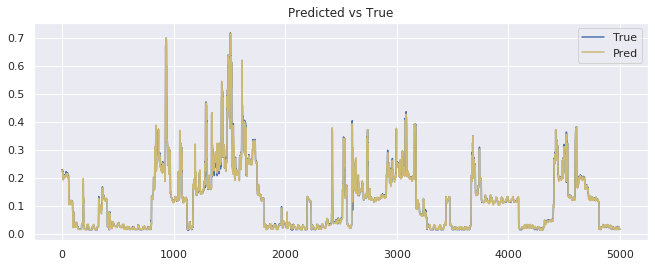

In [54]:
plt.plot(y_test[0:5000], 'b')
plt.plot( predict[0:5000], 'y')
plt.legend(['True', 'Pred'])
plt.title('Predicted vs True')
plt.show()

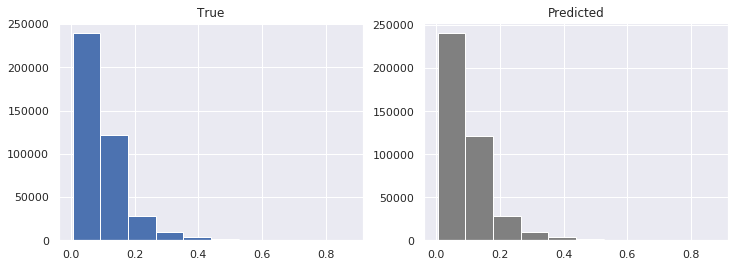

In [55]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(y_test)
plt.title('True')

plt.subplot(1,2,2)
plt.hist(predict, color='grey')
plt.title('Predicted')
plt.show()

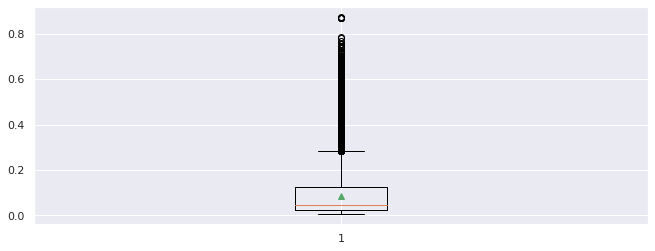

In [56]:
plt.boxplot(predict, showmeans=True)
plt.show()

## Time Based Prediction Plot

In [59]:
true = result_scaler.inverse_transform([y_test]) # true values without scaling
result = result_scaler.inverse_transform([predict])  # predicted values without scaling

In [70]:
tm = input_scaler.inverse_transform(x_test[:,:2])  # descaling test input values

In [71]:
x_test.shape

(404661, 7)

In [72]:
tm1 = x_test[:,6]   # Test set minute values
tm2 = x_test[:,5]   # Test set hour values
tm3 = x_test[:,2]   # Test set Day values
tm4 = x_test[:,3]   # Test set Month values
tm5 = x_test[:,4]   # Test set Year values

In [73]:
# Result DataFrame without scaled values for true and predicted
res = pd.DataFrame()
res['Minute'] = tm1.astype(int)
res['Hour'] = tm2.astype(int)
res['Day'] = tm3.astype(int)
res['Month'] = tm4.astype(int)
res['Year'] = tm5.astype(int)
res['True'] = np.squeeze(true)
res['Predicted'] = np.squeeze(result)
res['Time'] = res['Minute'].map(str) +'-' +res['Hour'].map(str) +'-' \
            +res['Day'].map(str) +'-' +res['Month'].map(str) +'-' + res['Year'].map(str)

In [74]:
# Sorting result values according to time in ascending order and resetting index
res1 = res.sort_values(by=['Year','Month','Day','Hour','Minute'])
res1 = res1.reset_index(drop=True)

In [75]:
res1.head()

,Minute,Hour,Day,Month,Year,True,Predicted,Time
0,0,0,0,1,2010,2.306,2.263417,0-0-0-1-2010
1,1,0,0,1,2010,2.302,2.292508,1-0-0-1-2010
2,2,0,0,1,2010,2.304,2.298427,2-0-0-1-2010
3,3,0,0,1,2010,2.306,2.298127,3-0-0-1-2010
4,4,0,0,1,2010,2.308,2.298740,4-0-0-1-2010


/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


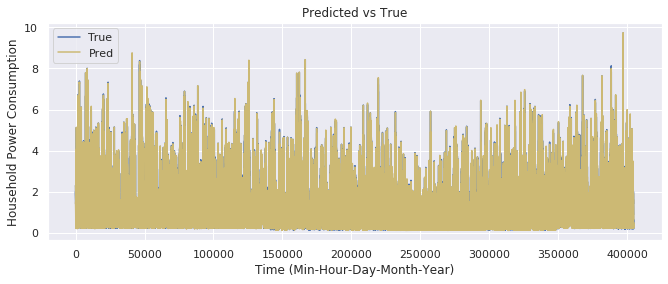

In [76]:
# Complete Test Set Plot
plt.plot(res1['True'], 'b')
plt.plot( res1['Predicted'], 'y')
plt.legend(['True', 'Pred'])
plt.title('Predicted vs True')
plt.ylabel('Household Power Consumption')
plt.xlabel('Time (Min-Hour-Day-Month-Year)')
plt.show()

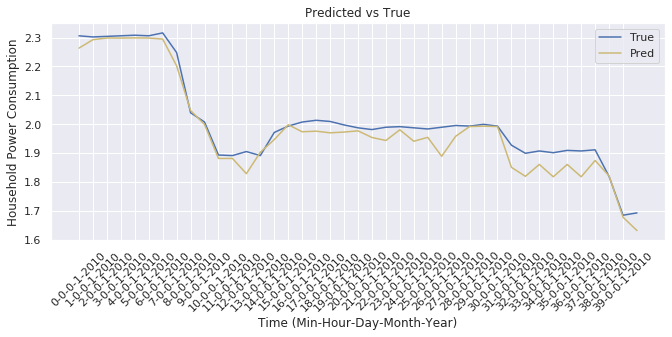

In [79]:
# First 40 Test Set Points Plot
plt.plot(res1.loc[:40,'True'], 'b')
plt.plot( res1.loc[:40,'Predicted'], 'y')
plt.legend(['True', 'Pred'])
plt.title('Predicted vs True')
# for displaying day time x-axis labels uncomment the next line
plt.xticks(ticks=np.arange(40), labels=res1.loc[:40,'Time'], rotation = 45)
plt.ylabel('Household Power Consumption')
plt.xlabel('Time (Min-Hour-Day-Month-Year)')
plt.show()

## User Input Data

In [44]:
def user():
    u = input('Do you want to enter custom data sample? Enter "y" or "n" :')
    if u == 'y':
        voltage = float(input('Enter Voltage (range is 220-260): '))  # asking for input from user
        global_i = float(input('Enter Global_intensity (range is 0.1-50 : '))
        date = str(input('Enter Date and time in format (21/03/201914:02) : '))
        
        new_data = np.array([[voltage,global_i,date]])  # creating array of all inputs
    else:
        new_data = None
                         
    return new_data

In [45]:
def u_output(u_dt):
    user_df = pd.DataFrame(u_dt, columns=['Voltage','Global_intensity', 'Date']) # converting input data to dataframe
    user_dt = pd.to_datetime(user_df['Date'], format='%d/%m/%Y%H:%M')   # for extracting date features
    user_df2 = user_df.drop(labels=['Date'], axis=1)
    sca_user_df1 = input_scaler.transform(user_df2)

    user_df1 = pd.DataFrame(sca_user_df1, columns=user_df2.columns)

    user_df1['Day'] = user_dt.dt.dayofweek
    user_df1['Month'] = user_dt.dt.month
    user_df1['Year'] = user_dt.dt.year
    user_df1['Hour'] =user_dt.dt.hour
    user_df1['Minute'] = user_dt.dt.minute
    u_pred = rf.predict(np.array(user_df1))
    u_real1 = result_scaler.inverse_transform([u_pred]) 
    
    return(u_real1)

In [46]:
# calling function for taking input from user
user_data = user()

Do you want to enter custom data sample? Enter "y" or "n" :y
Enter Voltage (range is 220-260): 230
Enter Global_intensity (range is 0.1-50 : 40
Enter Date and time in format (21/03/201914:02) : 22/03/201212:00


In [47]:
#predicting input data output
if user_data is None:
    print('Process Completed')
else:
    o1 = u_output(user_data)
    print('Global_active_power is: %.2f'%o1)

Global_active_power is: 9.22


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
